In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd.DataFrame({'Column Names':df.columns.values},index=range(1,22))


,Column Names
1,customerID
2,gender
3,SeniorCitizen
4,Partner
5,Dependents
6,tenure
7,PhoneService
8,MultipleLines
9,InternetService
10,OnlineSecurity


In [4]:
df.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Observations: 

* No Null values
* Total of 21 columns

In [6]:
#printing the unique values of all the columns
for i in df: print ("No. of values=",df[i].nunique(),'\n',df[i].value_counts(),'\n','-'*100)

No. of values= 7043 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 Male      3555
Female    3488
Name: gender, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 No     3641
Yes    3402
Name: Partner, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 
 -------------------------------------------------

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

## Observations: 
There are empty values in TotalCharges

# **Exploratory Data Analysis & Data Visualization**

In [9]:
categorical_feats, numerical_feats = [], []

for i in df: 
    if df[i].dtypes=='object': categorical_feats.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'): numerical_feats.append(i)

print('Total Number of Features →', df.shape[1])
print('Number of Categorical Features →', len(categorical_feats))
print('Number of Numerical Features →', len(numerical_feats))

Total Number of Features → 21
Number of Categorical Features → 18
Number of Numerical Features → 3


In [10]:
df.groupby(['gender'])['Churn'].size()


gender
Female    3488
Male      3555
Name: Churn, dtype: int64

Churn means the number of people that close their contract with ur telecom so having a high churn rate is not good. Therefore lets check the Churn rate in percentage

In [11]:
df_churned = df["Churn"][df["Churn"] == 'Yes']
print ("Churn Percentage =", str(round((df_churned.shape[0] / df["Churn"].shape[0]) * 100,2))+'%' )

Churn Percentage = 26.54%


In [12]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

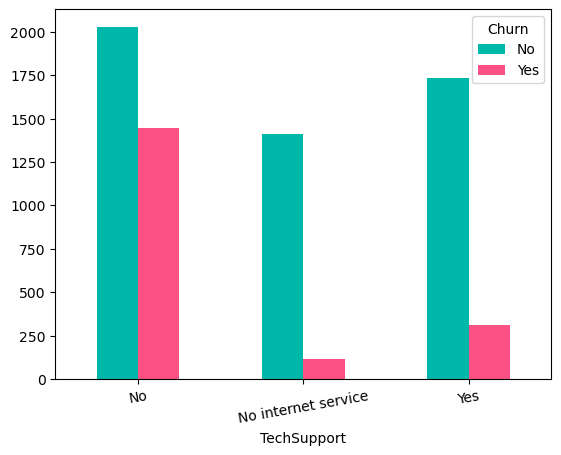

In [13]:
df.groupby(["TechSupport", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observations: 
Majority of the people leaving have not signed up for tech support.

### Assumption: 
People might be departing due to the lack of suitable customer care.

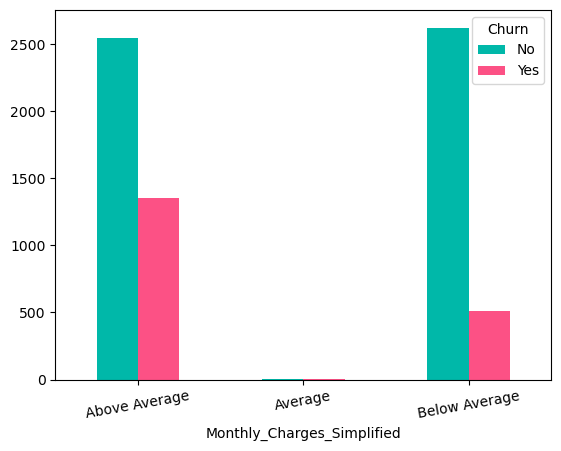

In [14]:
# determining whether excessive monthly fees are the cause of the individuals departing
df_new = df.copy() # We copy and create a new df so we dont cause any changes in the original
Monthly_Charges_Simplified = [] # Create a new array to be able determine monthly charges more easily
for i in df_new['MonthlyCharges']:
    if i > 65: Monthly_Charges_Simplified.append('Above Average') 
    elif i == 65: Monthly_Charges_Simplified.append('Average')
    elif i < 65: Monthly_Charges_Simplified.append('Below Average')
df_new['Monthly_Charges_Simplified'] = Monthly_Charges_Simplified

# plot
df_new.groupby(['Monthly_Charges_Simplified','Churn']).size().unstack().plot(kind='bar',stacked=False, color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation :
Majority of the people leaving are paying more then $65

### Assumption :
The majority of visitors might be departing because they found a better alternative to their current telecom provider that charges less than $65

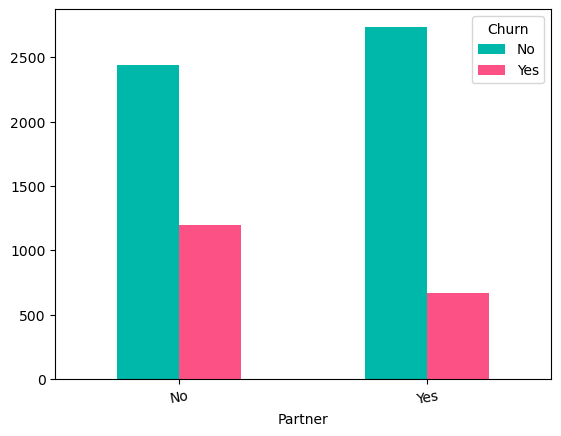

In [15]:
df.groupby(["Partner", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation : 
Customers with no partners are more likely to leave their current service.

### Assumption : 
This is likely due to the fact that people with partners will have to take each others choices into consideration and even if one partner is unhappy with the service they might continue with it with their partner is happy with it. Also in scenarios where one partner might be leaving the country due to some reason for long term if they were alone they would cancel the service however if their partner continues in the same country they will keep the service active for them

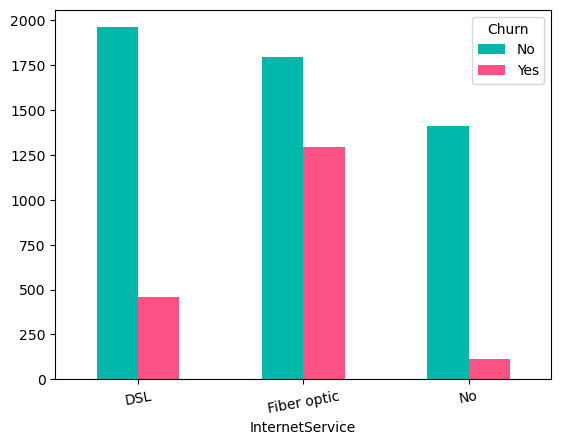

In [16]:
df.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation : 
Customers with fibre optic have a much higher churn rate

### Assumption : 
This might be because the fibre optic connection promised might not be up to standards or faulty

# **Feature Engineering**

In [17]:
#Tenure groups, Monthly charges and Total charges will be divided into groups

#Tenure (the number of months the customer has stayed with the company)
Tenure = []
for t in df.tenure: 
    if t <= 12: Tenure.append('Bronze Customer')
    elif t <= 36: Tenure.append('Silver Customer')
    elif t <= 55: Tenure.append('Gold Customer')        
    elif t > 55: Tenure.append('Platinum Customer')      
        
#MontlyCharges 
Monthly = []
for m in df.MonthlyCharges: 
    if m <= 36: Monthly.append('Telecom Package 1')
    elif m <= 75: Monthly.append('Telecom Package 2')
    elif m <= 95: Monthly.append('Telecom Package 3')        
    elif m > 95: Monthly.append('Telecom Package 4')
        
#Total Charges {removing the blank values and replacing it with the 25 Quartile value}
TotalCharge = []
for values in df.TotalCharges:
    if values != ' ': TotalCharge.append(values)
    else: TotalCharge.append('1609')
df.TotalCharges = TotalCharge
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x))

TotalC = []
for c in df.TotalCharges: 
    if c <= 1700: TotalC.append('Annual Bronze') 
    elif c <= 3500: TotalC.append('Annual Silver')
    elif c <= 5000: TotalC.append('Annual Gold')        
    elif c > 5000: TotalC.append('Annual Platinum')

In [18]:
df.tenure = Tenure
df.MonthlyCharges = Monthly
df.TotalCharges = TotalC

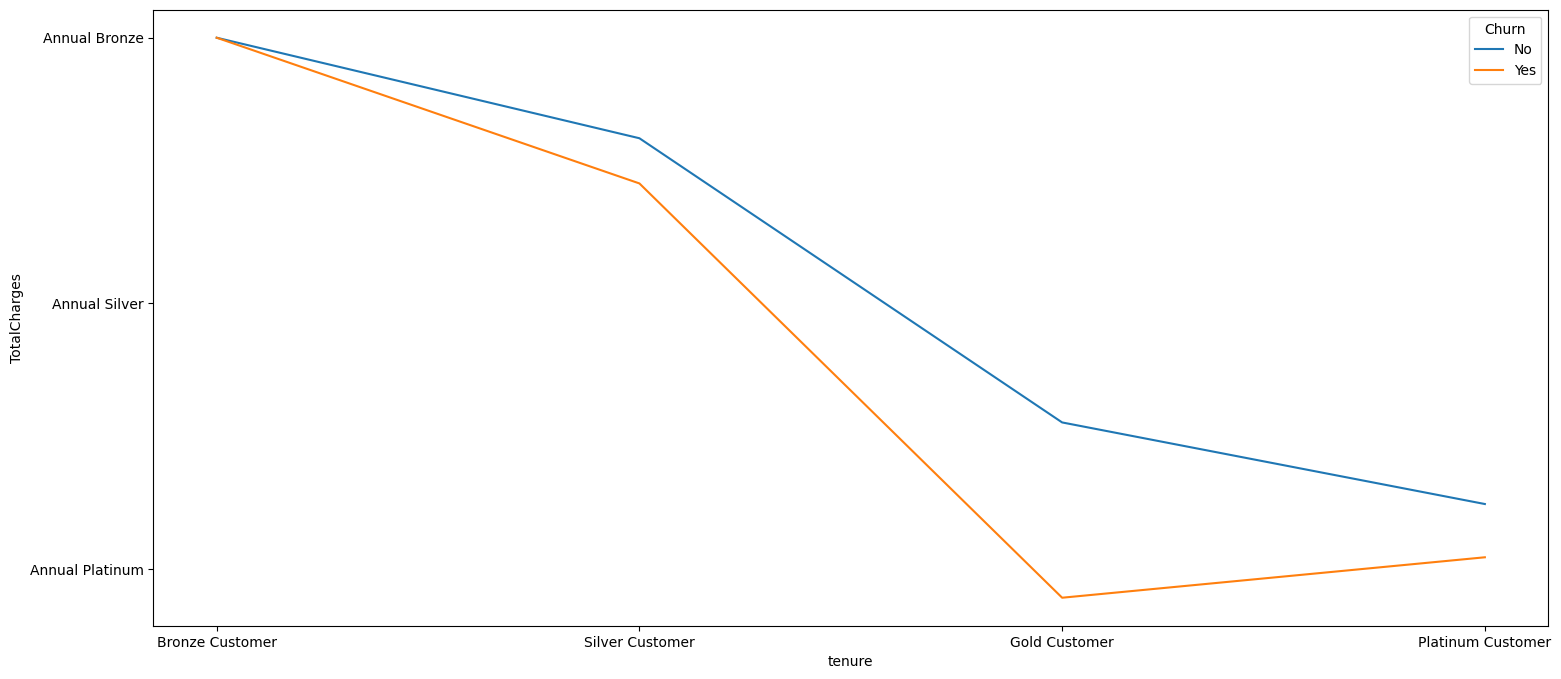

In [19]:
plt.figure(figsize=(18,8))
sns.lineplot(x='tenure',y='TotalCharges',hue='Churn',data=df, ci=None)
plt.show()

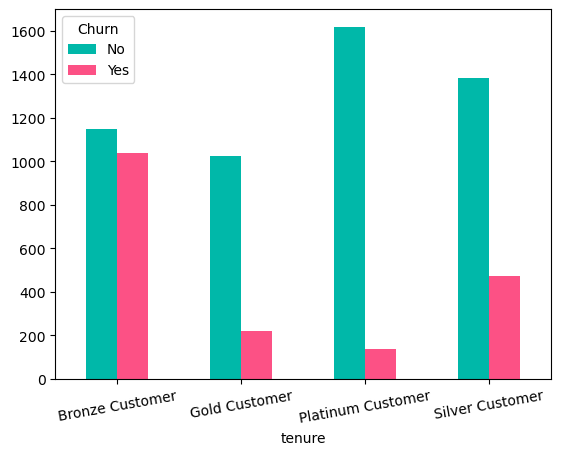

In [20]:
df.groupby(["tenure", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation
* We can see that platinum customers (customers with more than 55 months of service) have the lowest churn rate.
* Ranking (lowest to highest churn rate):
    * Platinum Customer
    * Gold Customer
    * Silver Customer
    * Bronze Customer

### Assumption 
* This might be because the telecom service provides better offers to long term customers and we can see this by the churn rates

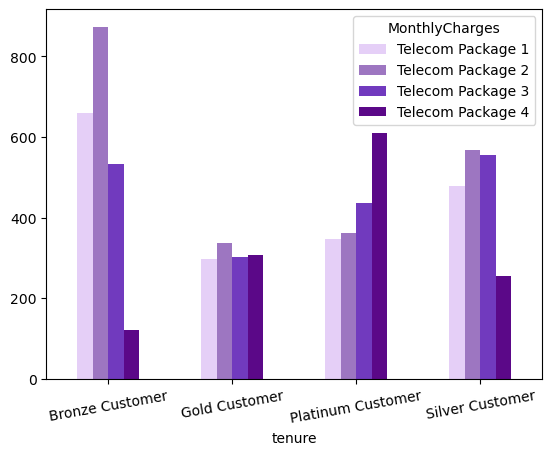

In [21]:
df.groupby(["tenure", "MonthlyCharges"]).size().unstack().plot(kind='bar', stacked=False, color=(['#E5CFF7','#9D76C1',
                                                                                                 '#713ABE','#5B0888']))
plt.xticks(rotation=10)
plt.show()

## Observation: 
* Bronze and Silver tenured (0-36 months) customers usually pay between 0-1500 USD.
* Gold Customers usually pay less than Platinum but have a higher churn rate then platinum.

### Assumption: 
* Better pricing for Bronze and silver customers may reduce their churn rates. 
* Platinum customers are more likely to stick with their current service as they are already comfortable with their service and have been using it for a long time. Therefore they would be a little more comfortable with paying a little more then gold customers since they like their service.

# **Label Encoding the Categorical columns** 
(convert categorical data into numerical values)

In [22]:
from sklearn.preprocessing import LabelEncoder

for i in df: 
    if df[i].dtypes == 'O': df[i] = LabelEncoder().fit_transform(df[i])

# **Outliers, Skewness, VIF (Variance Inflation Factor) and Correlation** 

Outliers : The few data that is extremely different from the majority of the data.

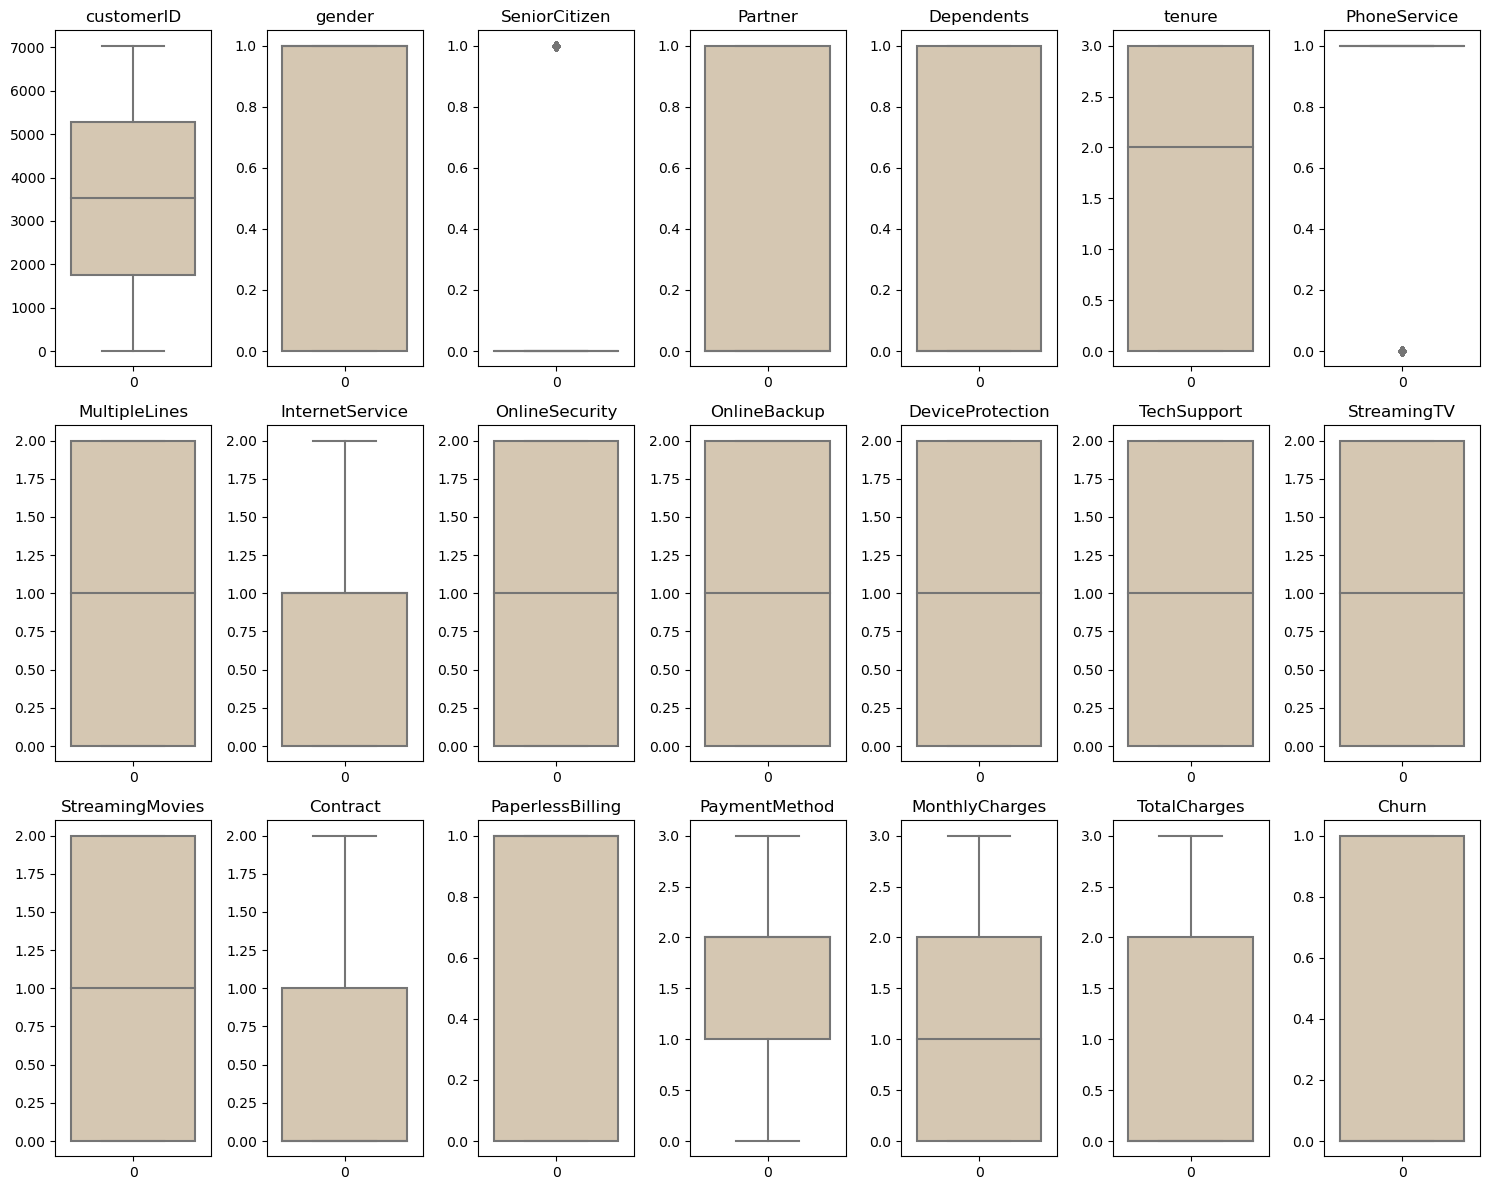

In [63]:
# outliers
collist = df.columns.values
nrows = 3
ncols = 7

plt.figure(figsize=(15,12))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(data=df[collist[i]],orient='v',palette=['#DBC8AC'])
    plt.title(collist[i])
    plt.tight_layout()

## Observation :
The only two columns with outliers are SeniorCitizen and PhoneService

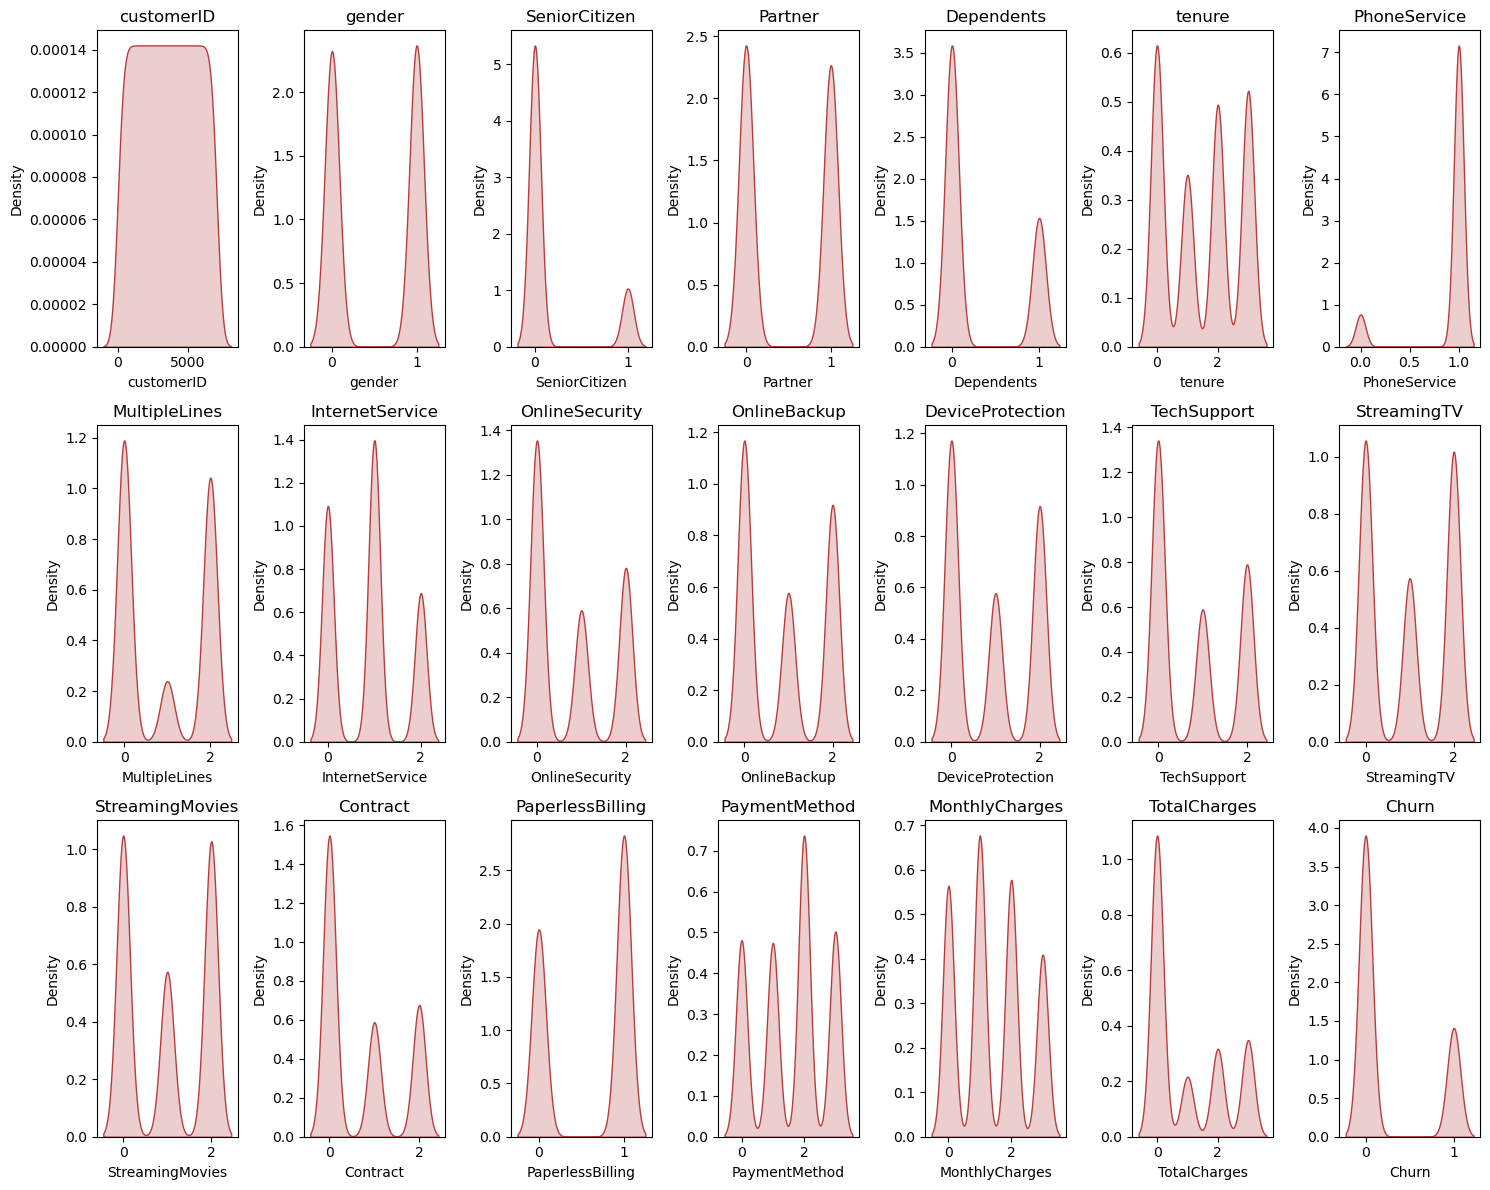

In [64]:
# skewness
collist = df.columns.values
nrows = 3
ncols = 7

plt.figure(figsize=(15,12))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(data=df[collist[i]],color='#B73E3E',fill=1)
    plt.title(collist[i])
    plt.tight_layout()

In [25]:
# checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['Columns'] = df.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
VIF[VIF.VIF_Factor>10]

,Columns,VIF_Factor
6,PhoneService,11.17543


## Observation:
PhoneService and MonthlyCharges have high VIF

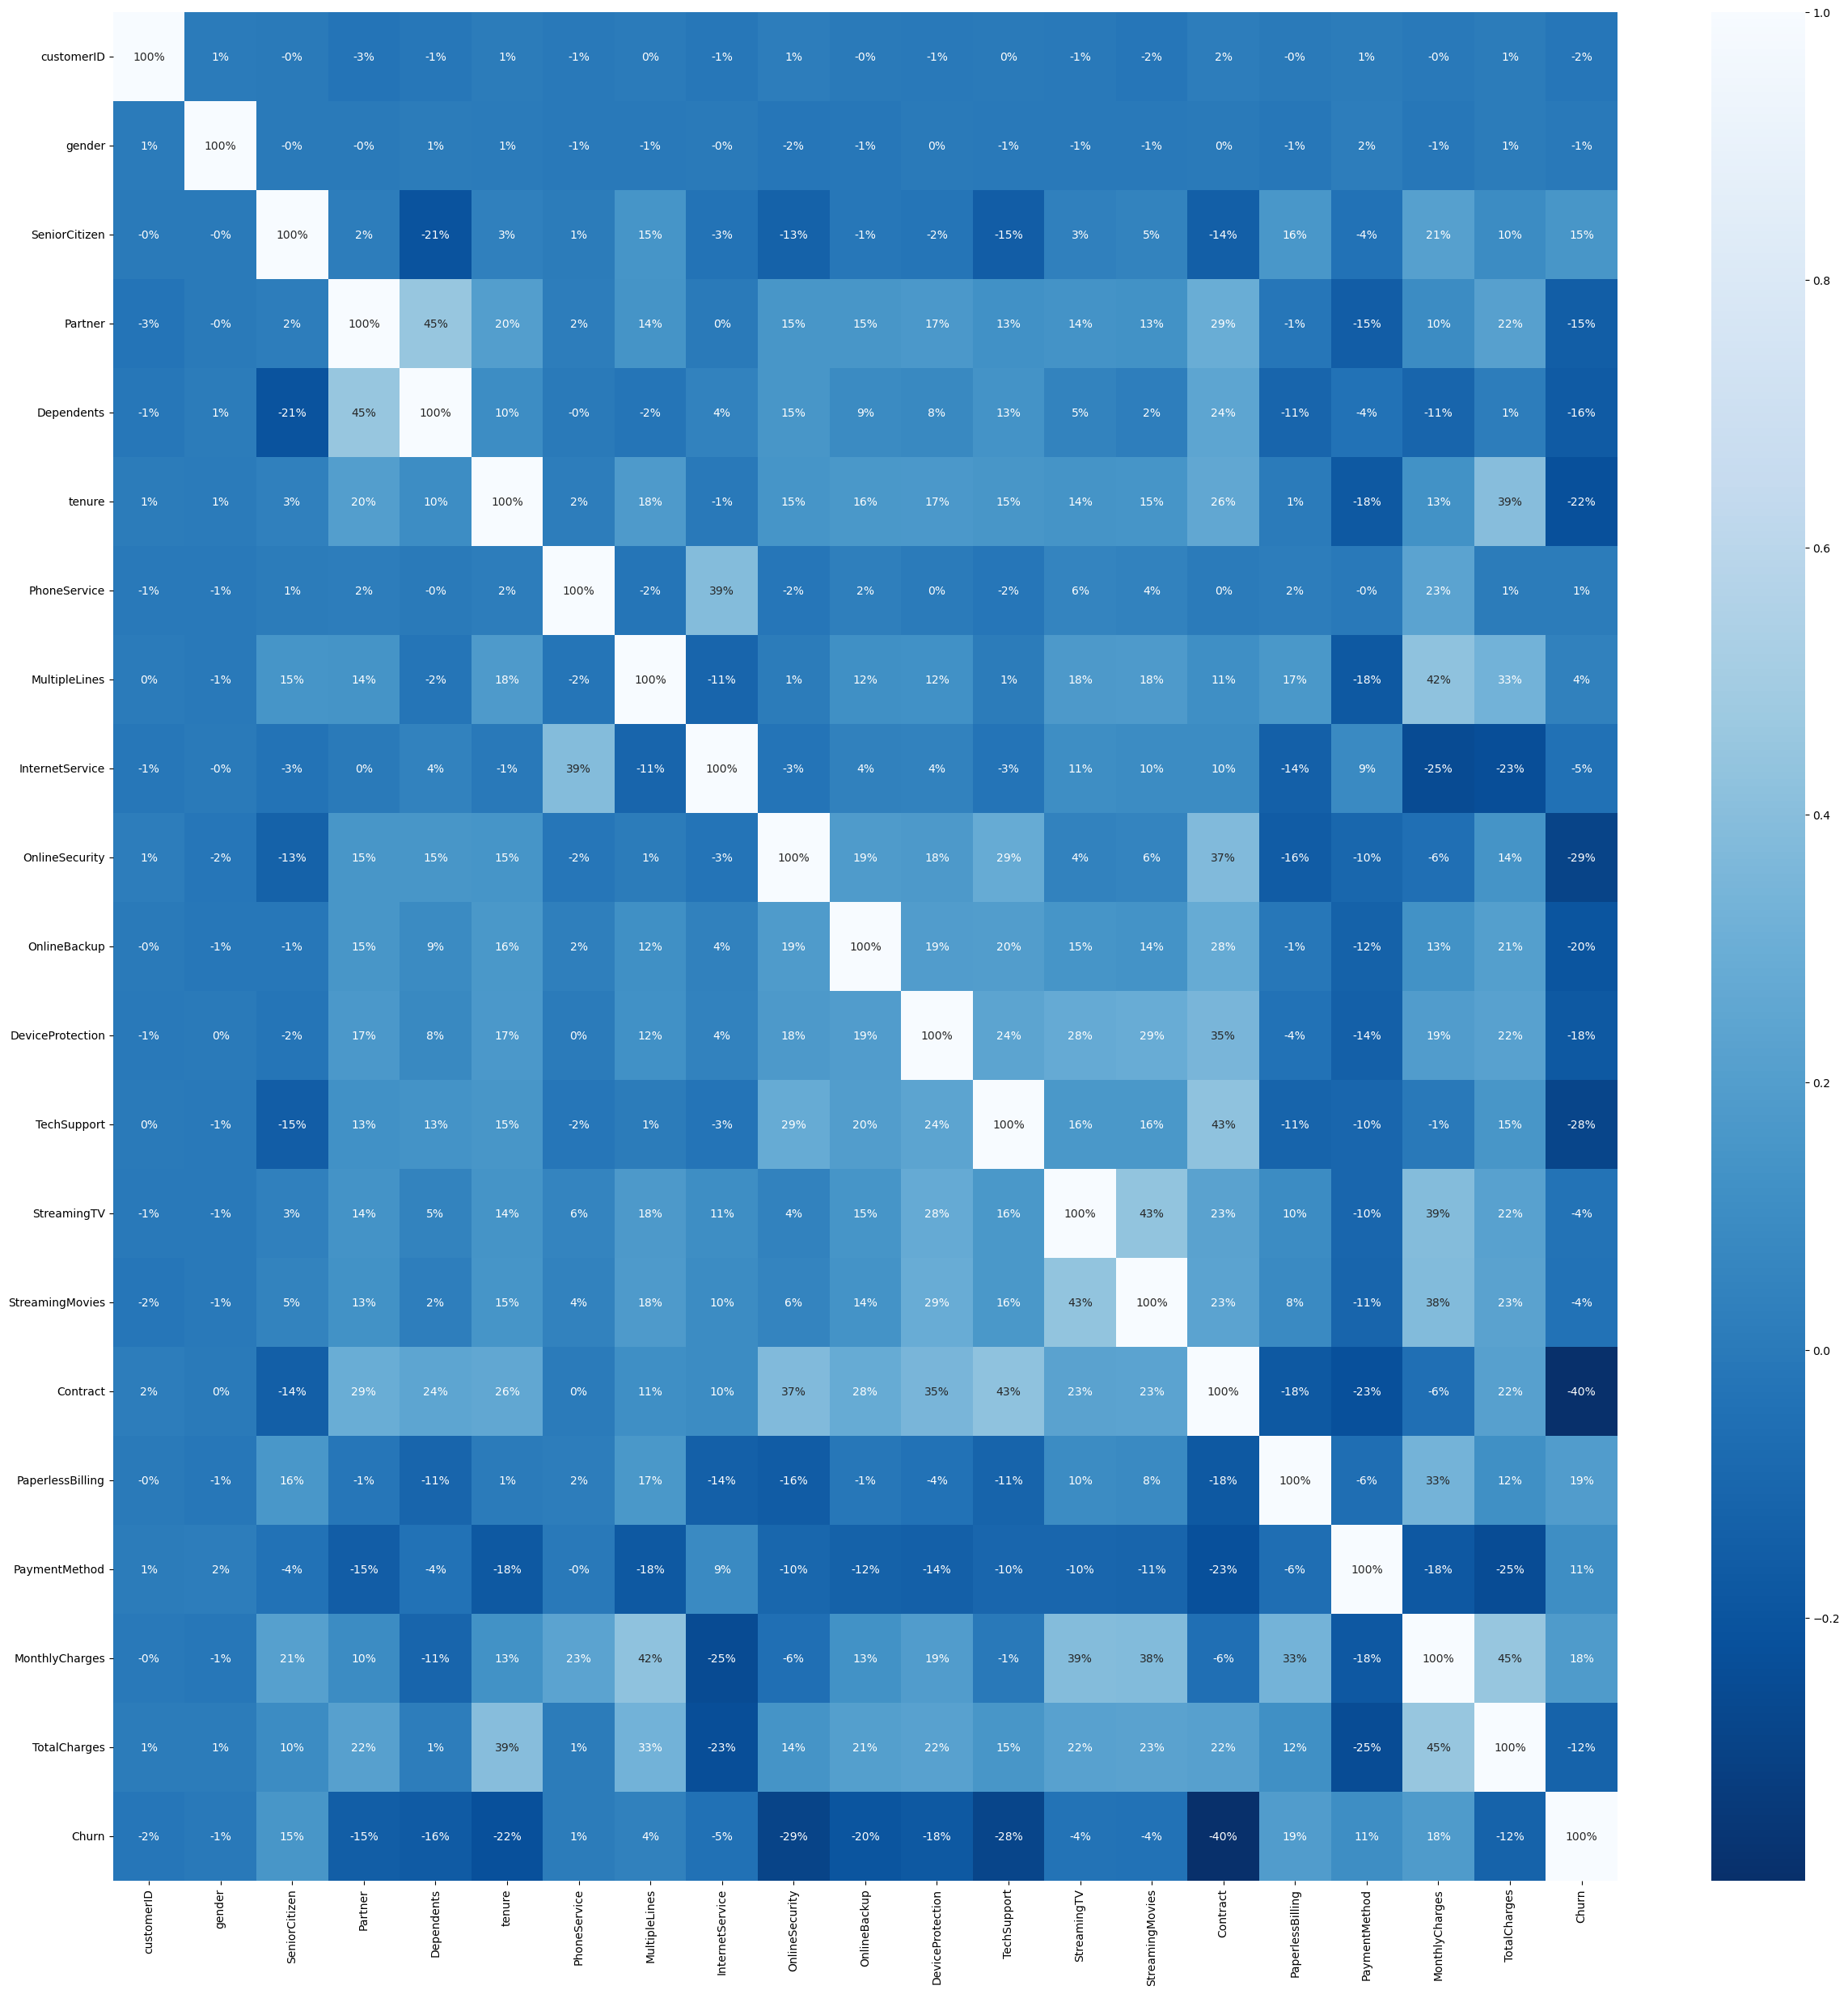

In [65]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, fmt='.0%',cmap='Blues_r')
plt.show()

## Observation: 
* Tenure has a high correlation with Contract → 67.16%
* MonthlyCharges has a high correlation with MultipleLines → 43.36%
* Contract has a high correlation with TechSupport → 42.54%
* StreamingMovies has a high correlation with StreamingTV → 43.48%
* Dependents has a high correlation with Partner → 45.27%

# Removing Outliers

In [27]:
# using zscore for outlier removal
from scipy.stats import zscore

z = np.abs(zscore(df))
df_z = df[(z<3).all(axis=1)] 
print ("Percentage of data loss =",(df.shape[0]-df_z.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 9.683373562402386 %


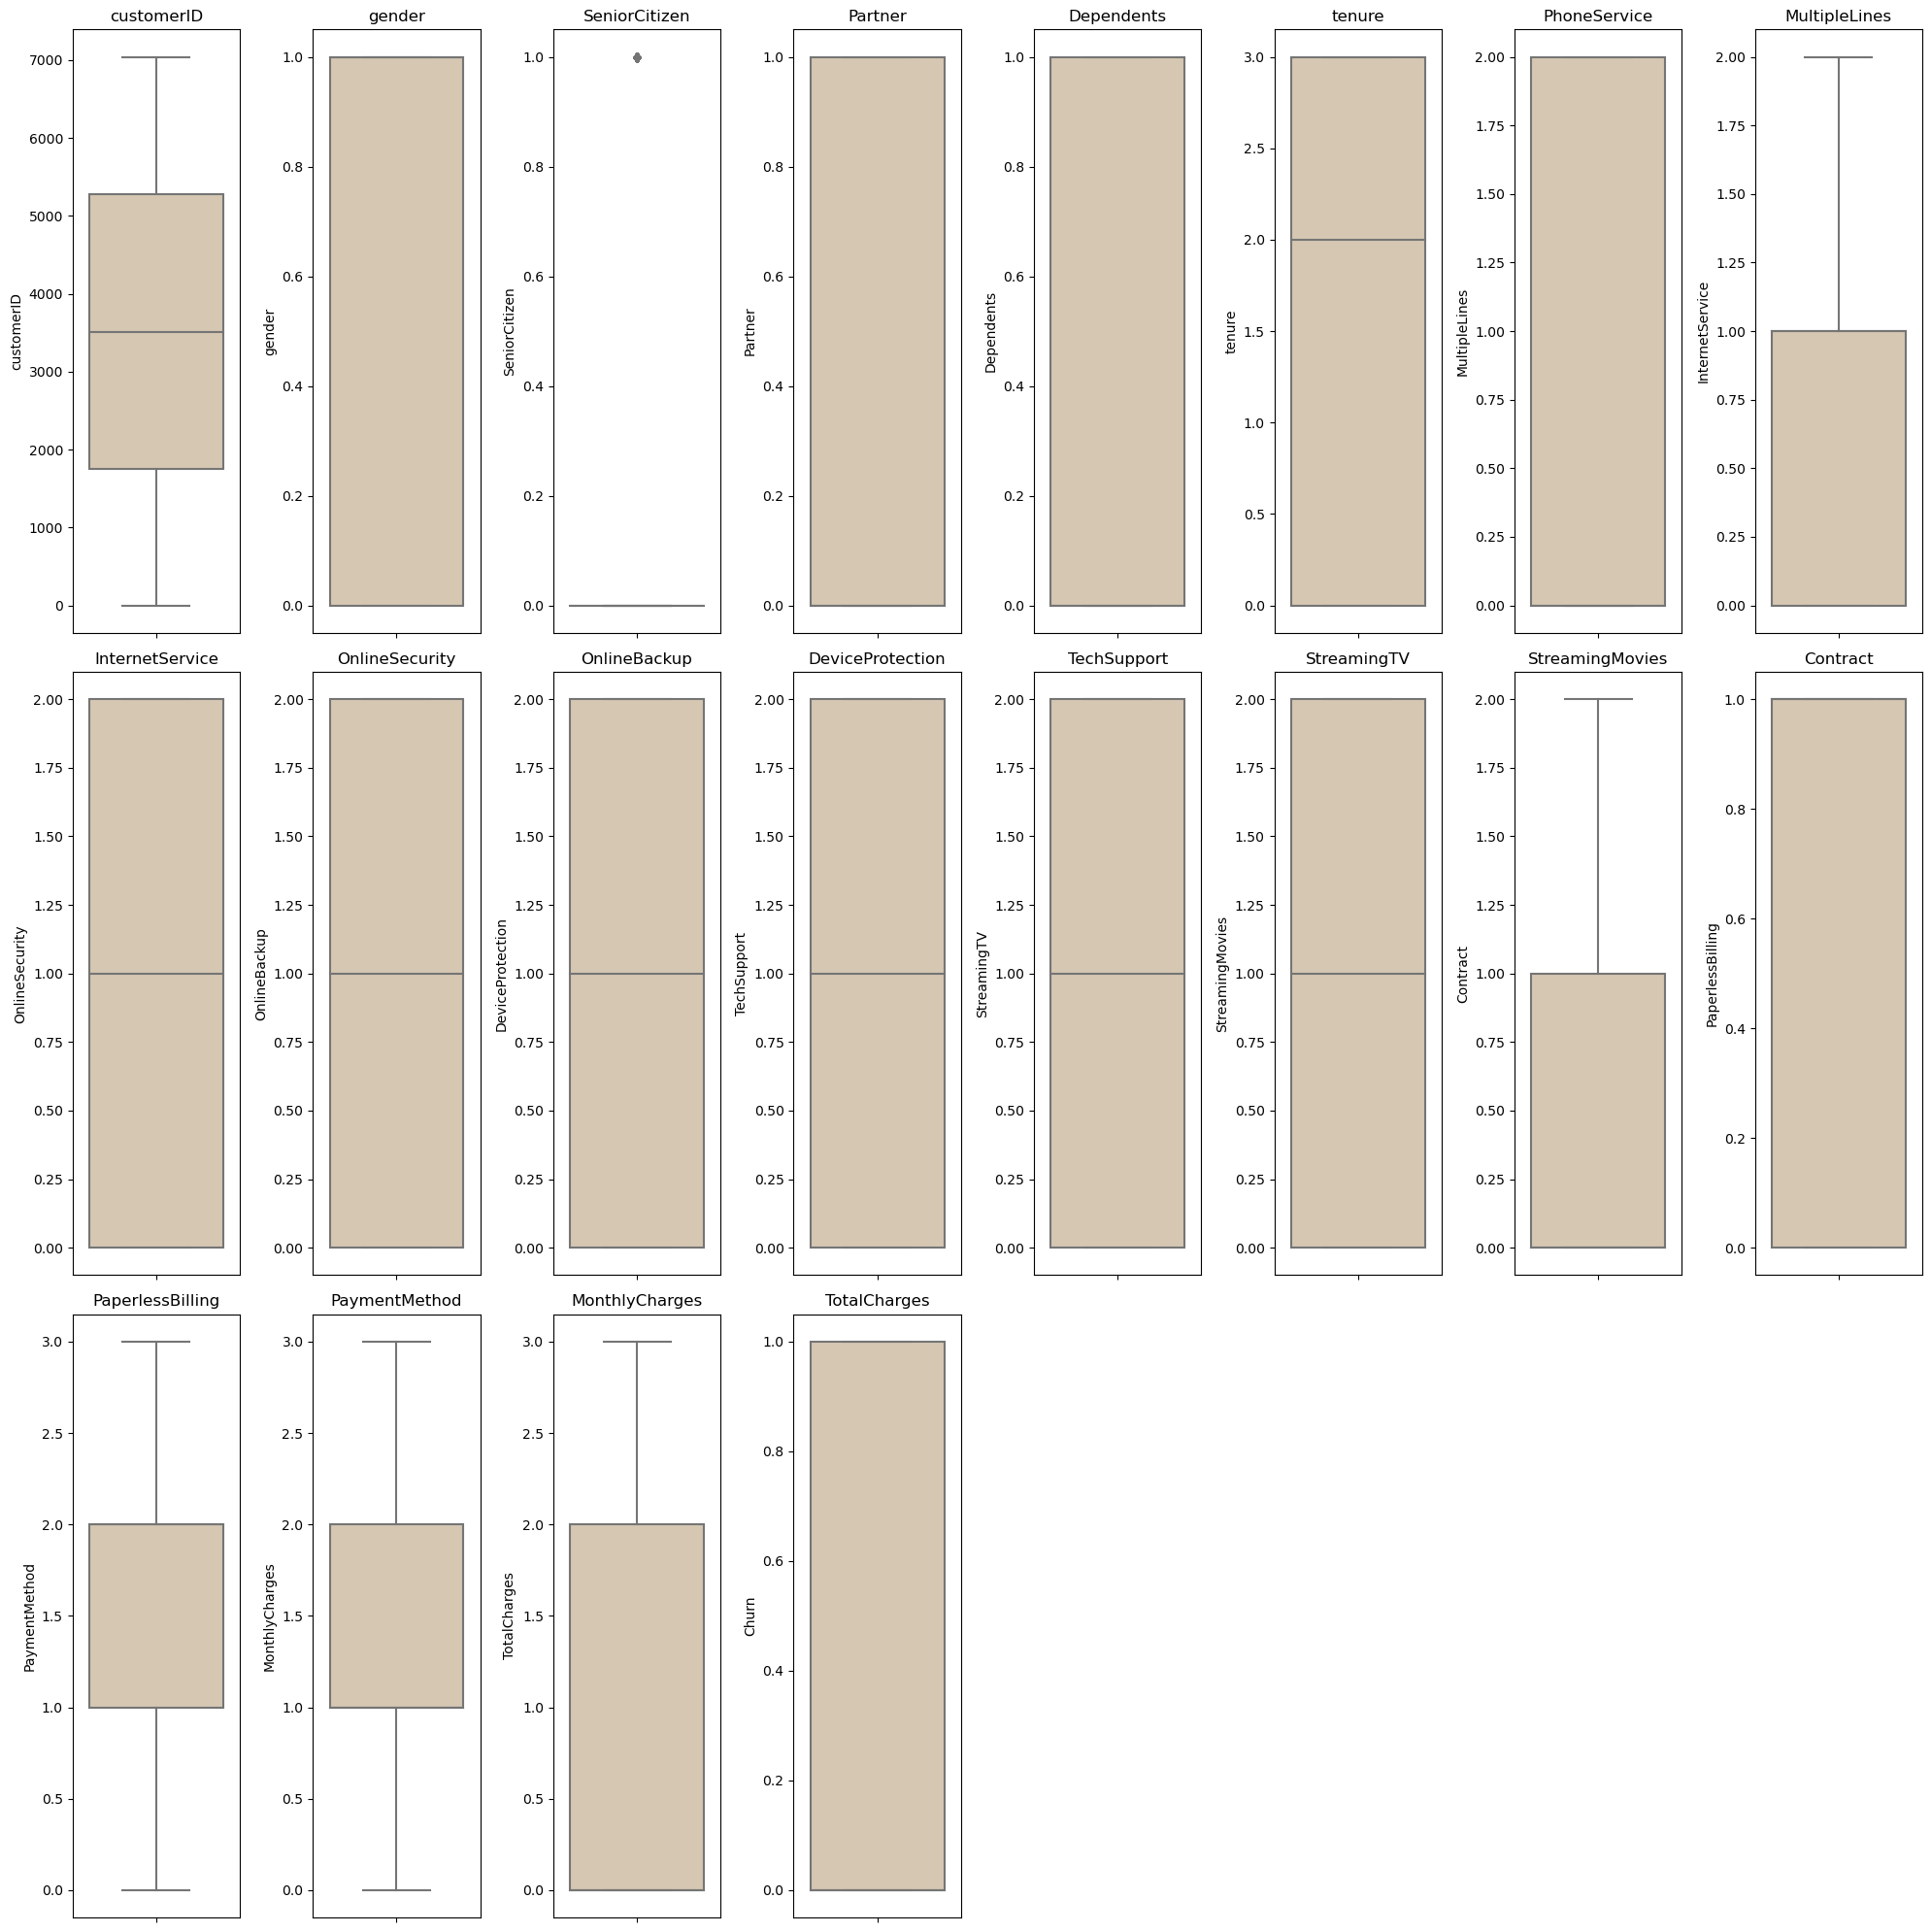

In [66]:
# outliers after zscore
collist = df_z.columns.values
nrows = 3
ncols = 8

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(y=df_z[collist[i]],palette=['#DBC8AC'])
    plt.title(df.columns[i])
    plt.tight_layout()


## Observation: 
Using z score results in almsot 10% data loss however it removes outliers from almost every column except SeniorCitizen

In [29]:
# checking multicollinearity 
VIF = pd.DataFrame()
VIF['Columns'] = df_z.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df_z.values,i) for i in range(df_z.shape[1])]
VIF[VIF.VIF_Factor>10]

,Columns,VIF_Factor
6,PhoneService,20.751641


In [30]:
df_z = df_z.drop('PhoneService',axis=1) #dropping phone service because of high VIF Factor

In [31]:
# using IQR method for outlier removal

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print ("Percentage of data loss =",(df.shape[0]-df_IQR.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 24.42141133039898 %


In [32]:
# outliers after using IQR to remove outliers
collist = df_IQR.columns.values
nrows = 3
ncols = 8

In [33]:
# Print the column names and check if they are as expected
print("Column names in df_IQR:", df_IQR.columns)

# Verify the shape of df_IQR
print("Shape of df_IQR:", df_IQR.shape)

Column names in df_IQR: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Shape of df_IQR: (5323, 21)


In [34]:
# Check for missing values in the column
missing_values = df_IQR[collist[i]].isnull().sum()
print(f"Missing values in {collist[i]}: {missing_values}")

# Check the data type of the column
data_type = df_IQR[collist[i]].dtype
print(f"Data type of {collist[i]}: {data_type}")


Missing values in Churn: 0
Data type of Churn: int32


In [35]:
#spaces = df_IQR.applymap(lambda x: any(x.isspace()) if isinstance(x, str) else False)
#if spaces.any().any(): print("Space found")

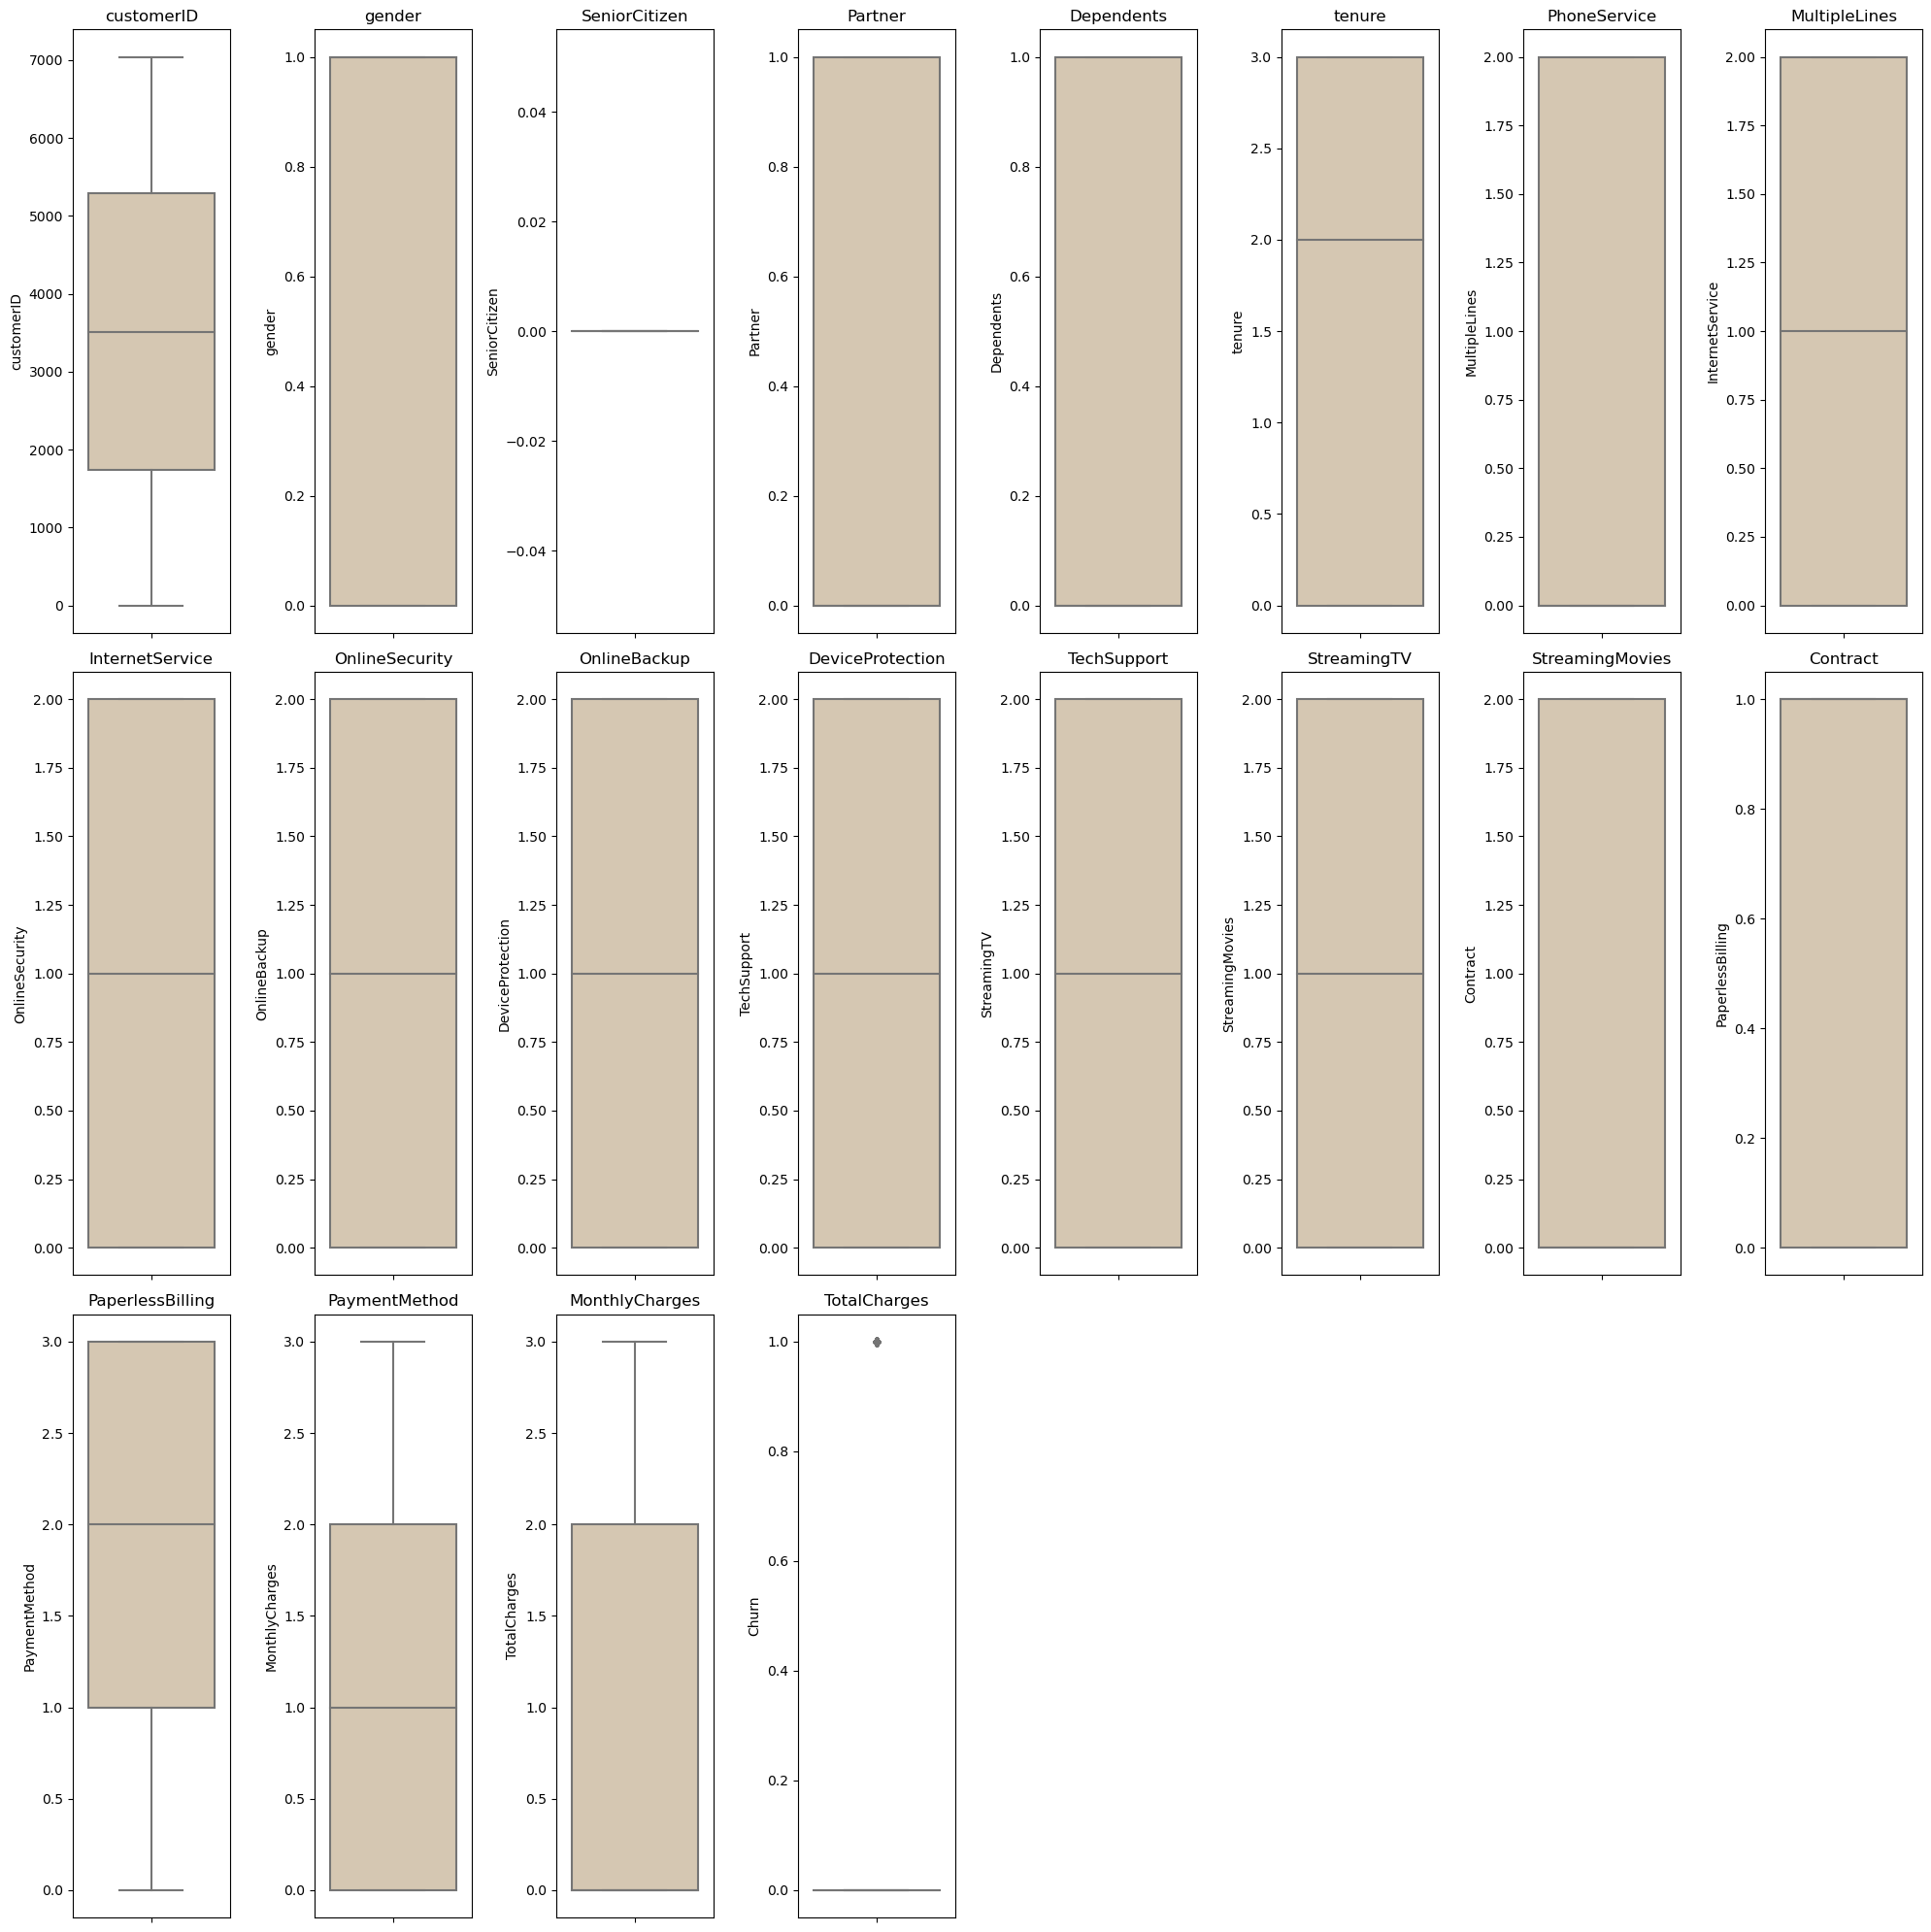

In [67]:
# outliers after using IQR to remove outliers
collist = df_IQR.columns
nrows = 3
ncols = 8

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(y = df_IQR[collist[i]], orient='v' , palette=['#DBC8AC'])
    plt.title(df.columns[i])
    plt.tight_layout()

In [37]:
# checking multicollinearity 
VIF = pd.DataFrame()
VIF['Columns'] = df_IQR.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df_IQR.values,i) for i in range(df_IQR.shape[1])]
VIF[VIF.VIF_Factor>10]

,Columns,VIF_Factor
6,PhoneService,20.454668


In [38]:
df_IQR = df_IQR.drop('PhoneService',axis=1) #dropping phone service because of high VIF Factor

## Observation:
* Using Zscore method to remove outliers led to a better predictive model with better accuracy when compared with the base model (i:e; without removing outliers).
* Using IQR led to the model having the best possible accuracy compared to both zscore and base.

# Splitting into X and Y:

In [39]:
df_IQR = pd.get_dummies(df_IQR)

In [40]:
df_IQR

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,3,0,0,2,0,2,0,0,0,1,0,3,1,3,0
2,2564,1,0,0,0,0,0,0,2,2,0,0,0,0,0,1,3,1,0,1
4,6511,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1,0,1
5,6551,0,0,0,0,0,2,1,0,0,2,0,2,2,0,1,2,3,0,1
6,1002,1,0,0,1,3,2,1,0,2,0,0,2,0,0,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,5995,1,0,0,0,3,0,1,0,0,0,0,2,0,0,1,0,2,0,0
7037,1758,0,0,0,0,2,0,2,1,1,1,1,1,1,2,1,0,0,0,0
7038,4853,1,0,1,1,3,2,0,2,0,2,2,2,2,1,1,3,2,3,0
7039,1525,0,0,1,1,2,2,1,0,2,2,0,2,2,1,1,1,3,2,0


In [41]:
x = df_IQR.drop(df_IQR[['customerID','Churn']],axis=1)
y = df_IQR['Churn']

# Standardizing: 

In [42]:
# standardizing and transforming the data
from sklearn.preprocessing import StandardScaler, power_transform

x = StandardScaler().fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [44]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [45]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model, score, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#      shows the classification report
    class_report = classification_report(y_test,y_pred)
    print (class_report)
    
    
#     shows the confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':[1,10]}
gs_lr = GridSearchCV(lr,lr_para,cv=3,scoring='accuracy')
gs_lr.fit(x_train,y_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'none'}

Model: LogisticRegression
Accuracy Score: 81.78
f1 Score: 81.78
CV Score: 0.8061211894652203
ROC_AUC Score: 69.17
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       817
           1       0.66      0.46      0.54       248

    accuracy                           0.82      1065
   macro avg       0.75      0.69      0.71      1065
weighted avg       0.80      0.82      0.81      1065



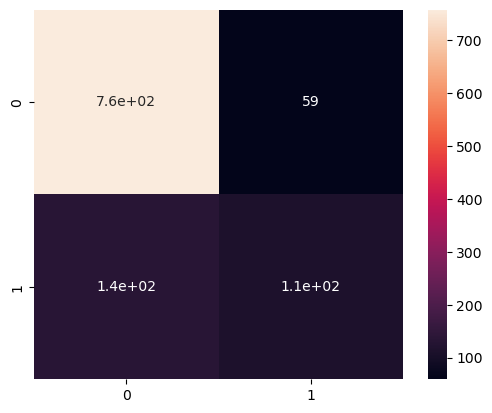

In [47]:
lr = LogisticRegression(penalty='none',C=1)
classification_model(lr) 

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'gini', 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy Score: 71.74
f1 Score: 71.74
CV Score: 0.7473169321051221
ROC_AUC Score: 60.66
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       817
           1       0.39      0.40      0.40       248

    accuracy                           0.72      1065
   macro avg       0.61      0.61      0.61      1065
weighted avg       0.72      0.72      0.72      1065



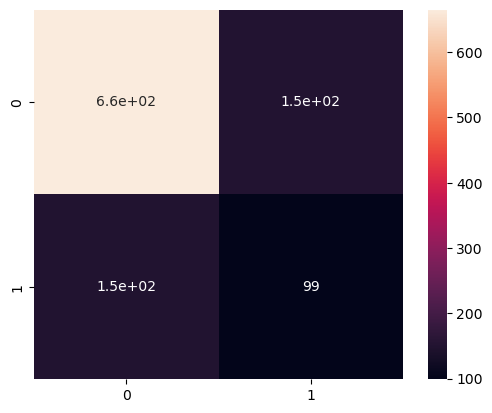

In [49]:
dtc = DecisionTreeClassifier(criterion='log_loss',splitter='random')
classification_model(dtc)

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

Model: RandomForestClassifier
Accuracy Score: 76.06
f1 Score: 76.06
CV Score: 0.78601687144691
ROC_AUC Score: 63.75
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       817
           1       0.48      0.41      0.44       248

    accuracy                           0.76      1065
   macro avg       0.66      0.64      0.64      1065
weighted avg       0.75      0.76      0.75      1065



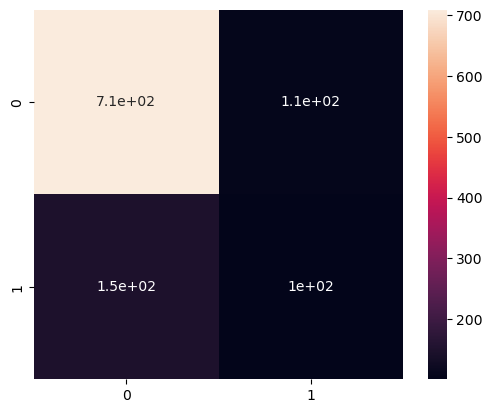

In [51]:
rfc = RandomForestClassifier(n_estimators=150,criterion='gini')
classification_model(rfc)

In [52]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=5,scoring='accuracy')
gs_abc.fit(x_train,y_train)
gs_abc.best_params_

{'algorithm': 'SAMME', 'n_estimators': 250}

Model: AdaBoostClassifier
Accuracy Score: 82.25
f1 Score: 82.25
CV Score: 0.8143890448447573
ROC_AUC Score: 70.88
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       817
           1       0.66      0.50      0.57       248

    accuracy                           0.82      1065
   macro avg       0.76      0.71      0.73      1065
weighted avg       0.81      0.82      0.81      1065



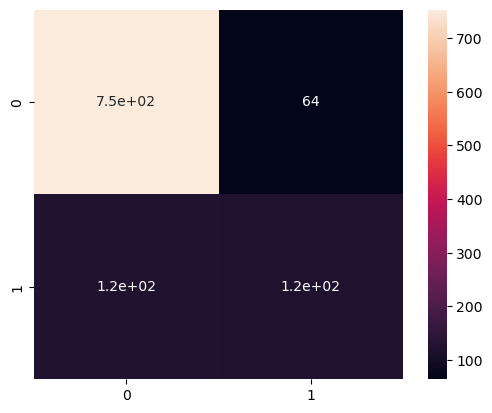

In [53]:
ada = AdaBoostClassifier(n_estimators=250,algorithm='SAMME')
classification_model(ada) 

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_para = {'n_estimators':range(50,300,50),'loss':['log_loss','deviance','exponential'],
            'criterion':['friedman_mse','squared_error','mse']}
gs_gbc = GridSearchCV(gbc,gbc_para,cv=5,scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'criterion': 'friedman_mse', 'loss': 'log_loss', 'n_estimators': 100}

Model: GradientBoostingClassifier
Accuracy Score: 81.69
f1 Score: 81.69
CV Score: 0.8142021329120175
ROC_AUC Score: 70.65
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       817
           1       0.64      0.50      0.56       248

    accuracy                           0.82      1065
   macro avg       0.75      0.71      0.72      1065
weighted avg       0.81      0.82      0.81      1065



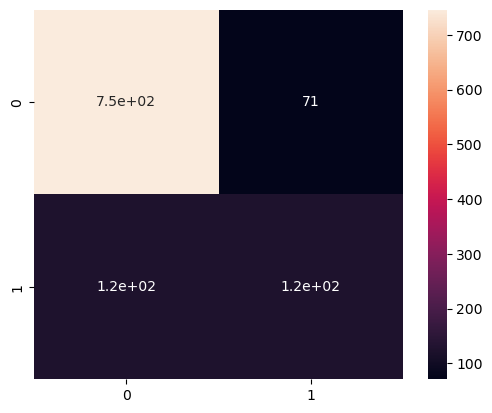

In [55]:
gbc = GradientBoostingClassifier(n_estimators=100,criterion='friedman_mse',loss='log_loss')
classification_model(gbc)

In [56]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,cv=5,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 200}

Model: BaggingClassifier
Accuracy Score: 76.24
f1 Score: 76.24
CV Score: 0.7785030117507652
ROC_AUC Score: 64.02
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       817
           1       0.49      0.41      0.45       248

    accuracy                           0.76      1065
   macro avg       0.66      0.64      0.65      1065
weighted avg       0.75      0.76      0.76      1065



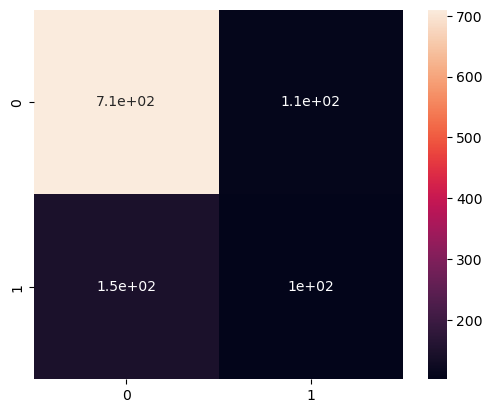

In [57]:
bc = BaggingClassifier(n_estimators=200)
classification_model(bc) 

In [58]:
from sklearn.svm import SVC
svc = SVC()
svc_para={'C':range(1,10),'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gsCV_svc = GridSearchCV(svc,svc_para,cv=3,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_

{'C': 1, 'kernel': 'rbf'}

Model: SVC
Accuracy Score: 80.94
f1 Score: 80.94
CV Score: 0.810633525652781
ROC_AUC Score: 67.36
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       817
           1       0.64      0.42      0.51       248

    accuracy                           0.81      1065
   macro avg       0.74      0.67      0.69      1065
weighted avg       0.79      0.81      0.79      1065



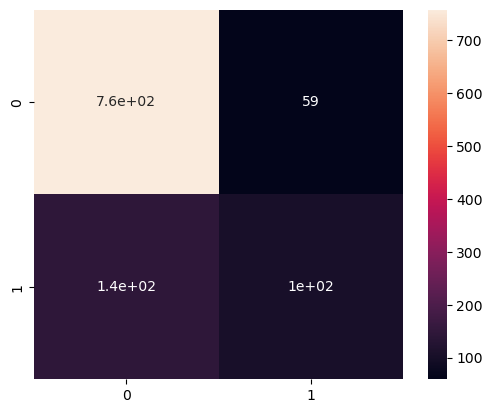

In [59]:
svc = SVC(kernel='rbf',C=1)
classification_model(svc)

In [60]:
classifier_models = pd.DataFrame({'Model Name':Model,'Accuracy Score':score,'F1 Score':f1,'CV Score':cross,
                                  'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='F1 Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
3,AdaBoostClassifier,82.25,82.25,0.814389,70.88
0,LogisticRegression,81.78,81.78,0.806121,69.17
4,GradientBoostingClassifier,81.69,81.69,0.814202,70.65
6,SVC,80.94,80.94,0.810634,67.36
5,BaggingClassifier,76.24,76.24,0.778503,64.02
2,RandomForestClassifier,76.06,76.06,0.786017,63.75
1,DecisionTreeClassifier,71.74,71.74,0.747317,60.66


# Conclusion:

AdaBoostClassifier is the best model for this project according to the metrics and the ROC_AUC score.

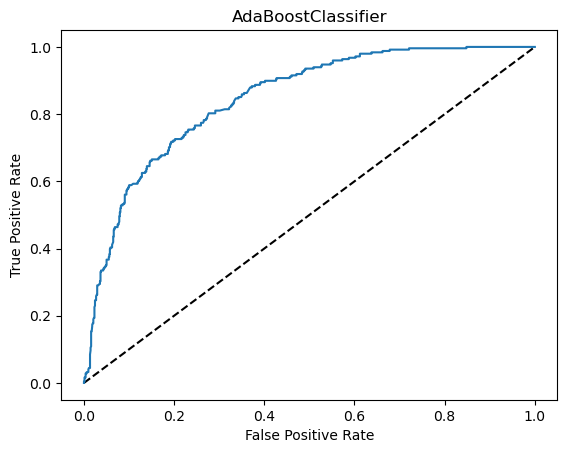

In [61]:
# Plotting ROC Curve for the model
from sklearn.metrics import roc_curve
y_pred_prob = ada.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Ada Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier')
plt.show()

<Axes: >

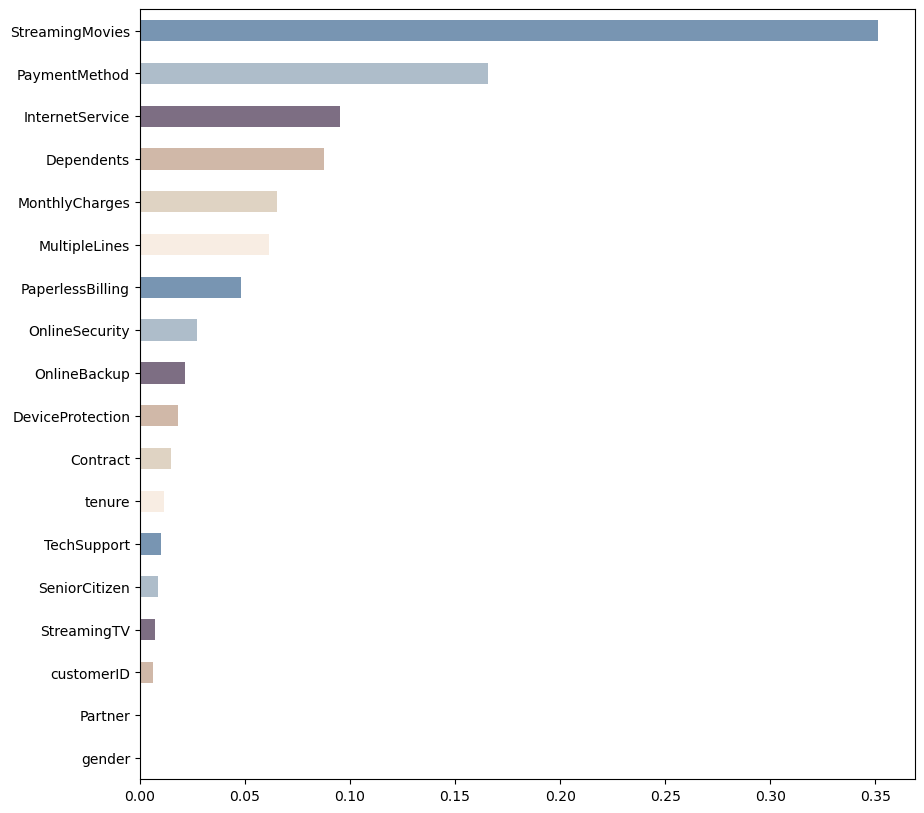

In [62]:
# Feature importance of the classifier
pd.Series(ada.feature_importances_, index = df_IQR.columns[:-2]).sort_values(ascending=True).plot(kind='barh', figsize=(10,10),
                                                                                               color=(['#F8EDE3','#DFD3C3',
                                                                                                     '#D0B8A8','#7D6E83',
                                                                                                      '#AEBDCA','#7895B2']))
